In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn import svm
from sklearn.metrics import mean_absolute_error

In [2]:
original_df1 = pd.read_csv('../input/wind_dataset_imputed_and_scaled1.csv')
df1 = original_df1.drop('DATE', axis='columns')

original_df2 = pd.read_csv('../input/wind_dataset_imputed_and_scaled2.csv')
df2 = original_df2.drop('DATE', axis='columns')

In [3]:
train_df1, test_df1 = train_test_split(df1, test_size=0.3, shuffle=False)

train_df2, test_df2 = train_test_split(df2, test_size=0.3, shuffle=False)

In [4]:
X1_train = train_df1.drop('WIND', axis='columns')
y1_train = train_df1['WIND']
X1_test = test_df1.drop('WIND', axis='columns')
y1_test = test_df1['WIND']

X2_train = train_df2.drop('WIND', axis='columns')
y2_train = train_df2['WIND']
X2_test = test_df2.drop('WIND', axis='columns')
y2_test = test_df2['WIND']

In [5]:
model = svm.SVR(kernel="rbf", epsilon=0.07, C=3, gamma="scale")

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores1 = cross_val_score(model, df1.drop('WIND', axis="columns"), df1['WIND'], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores1 = absolute(scores1)
print('Mean MAE: %.3f (%.3f)' % (scores1.mean(), scores1.std()) )

scores2 = cross_val_score(model, df2.drop('WIND', axis="columns"), df2['WIND'], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = absolute(scores2)
print('Mean MAE: %.3f (%.3f)' % (scores2.mean(), scores2.std()) )

Mean MAE: 0.120 (0.004)
Mean MAE: 0.120 (0.003)


0.116


<AxesSubplot:xlabel='DATE'>

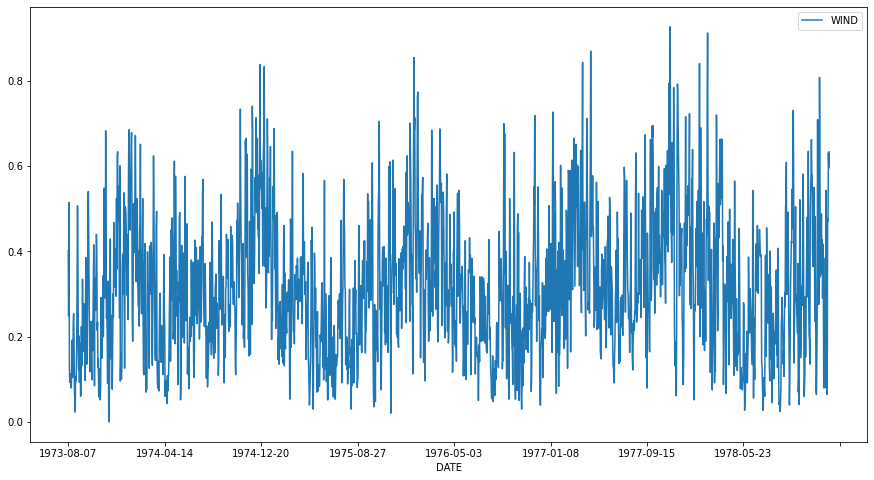

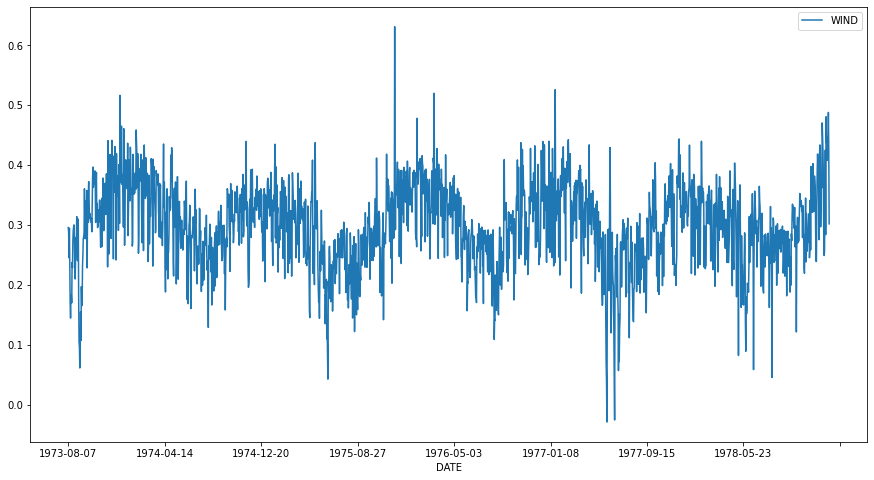

In [6]:
model.fit(X1_train, y1_train)

predicted_y1 = model.predict(X1_test)

print(round(mean_absolute_error(y1_test, predicted_y1), 3))

test_df1['DATE'] = original_df1['DATE']
test_df1 = test_df1.set_index('DATE')
test_df1.plot(y='WIND',figsize=(15,8))

predicted_y1_df1 = pd.DataFrame([list(x) for x in zip(test_df1.index.array, predicted_y1)], columns=['DATE', 'WIND'])
predicted_y1_df1 = predicted_y1_df1.set_index('DATE')
predicted_y1_df1.plot(y='WIND',figsize=(15,8))

0.116


<AxesSubplot:xlabel='DATE'>

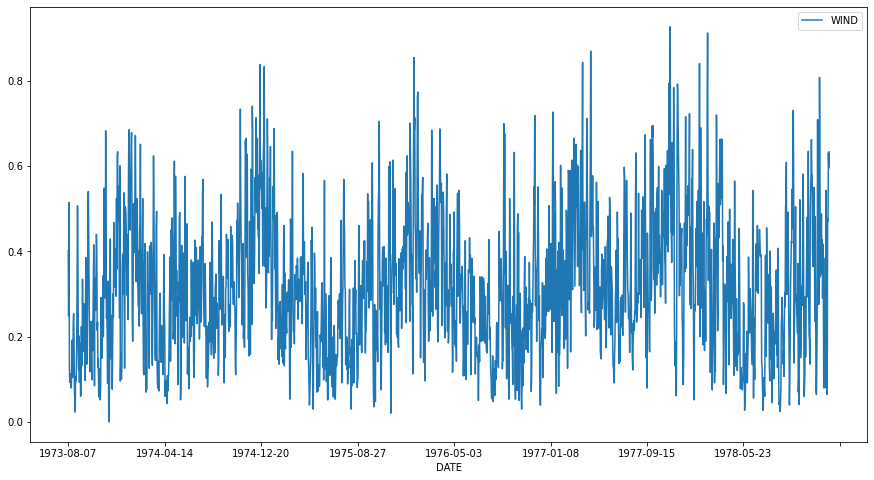

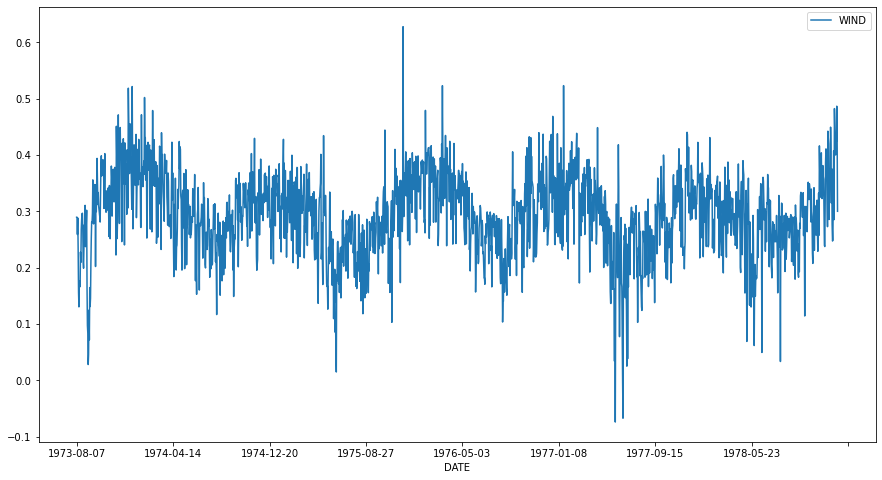

In [7]:
model.fit(X2_train, y2_train)

predicted_y2 = model.predict(X2_test)

print(round(mean_absolute_error(y1_test, predicted_y1), 3))

test_df2['DATE'] = original_df2['DATE']
test_df2 = test_df2.set_index('DATE')
test_df2.plot(y='WIND',figsize=(15,8))

predicted_y2_df2 = pd.DataFrame([list(x) for x in zip(test_df2.index.array, predicted_y2)], columns=['DATE', 'WIND'])
predicted_y2_df2 = predicted_y2_df2.set_index('DATE')
predicted_y2_df2.plot(y='WIND',figsize=(15,8))